In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from pipeline import LBP_3DT,LBP_4D
import pickle

In [2]:
mapping=pd.read_csv('../Datasets/XV Clinical Data/WCH_XV_genotypes.csv')
mapping.columns=['Record ID','Condition']
mapping=dict(zip(mapping['Record ID'],mapping['Condition']))


csv_dir = '../Datasets/XV Clinical Data'
csv_files = [fold for fold in os.listdir(csv_dir) if os.path.isdir(os.path.join(csv_dir, fold)) and 'WCH' in fold]


dataframes=[]
control=[]
cf=[]
for fold in csv_files:
    p=os.path.join(csv_dir, fold)
    key=int(p.split('-')[2])-10000
    files=[f for f in os.listdir(p) if os.path.isdir(os.path.join(p, f)) and '-LOBAR' not in f and 'WCH' in f]
    curr_csv=[]
    for f in files:
        path=os.path.join(p, f)
        csv=[pd.read_csv(os.path.join(path,c)) for c in os.listdir(path) if c.endswith('_final.csv')]
        if 'EXP' in f:
            csv[0]['Frame']=csv[0]['Frame']+7
        curr_csv.extend(csv)
    

    dataframes.append(pd.merge(curr_csv[0], curr_csv[1], how='outer'))
    if 'Control' in mapping[key]:
        control.append(pd.merge(curr_csv[0], curr_csv[1], how='outer'))
    else:
        cf.append(pd.merge(curr_csv[0], curr_csv[1], how='outer'))
        





In [3]:
control[0]

,Frame,"divergence.0, 0",position.x,position.y,position.z
0,0,-0.016780,24,16,48
1,0,-0.011368,-32,-64,64
2,0,-0.008276,-40,-64,72
3,0,-0.007420,-32,-64,56
4,0,-0.006541,-40,-56,64
...,...,...,...,...,...
53132,13,0.127125,-88,-56,0
53133,13,0.139179,-80,-64,16
53134,13,0.188481,-88,-64,16
53135,13,0.193652,-80,-64,8


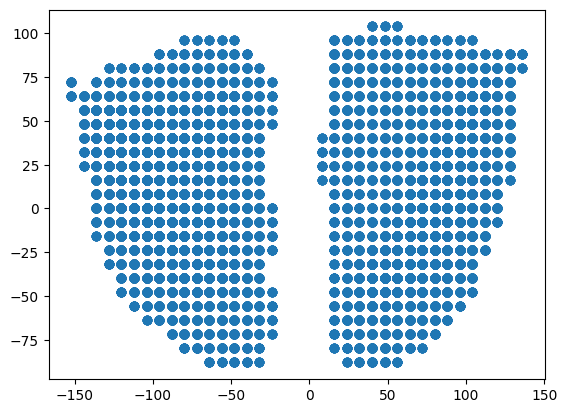

In [4]:
df=control[0]
df.columns=['Frame','SV','X','Y','Z']

plt.scatter(df['X'],df['Z'])

In [5]:
dataframes=[]
for c in control:
    c.columns=['Frame','SV','X','Y','Z']
    dataframes.append([c,0])
for c in cf:
    c.columns=['Frame','SV','X','Y','Z']
    dataframes.append([c,1])

lbp=LBP_4D(dataframes)

features=lbp.extract()



152 96 132
Start for this sample
Empty grid initialised


KeyError: np.True_

In [ ]:

with open('file', 'rb') as fp:
    res = pickle.load(fp)

In [ ]:
features[19][0]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.030075,0.015038,0.015038,0.022556,0.007519,0.000000,0.000000,0.011494,0.017241,0.017241,0.017241,0.017241,0.011494,0.011494
1,0.007519,0.000000,0.000000,0.000000,0.007519,0.007519,0.007519,0.040230,0.028736,0.028736,0.028736,0.028736,0.034483,0.011494
2,0.015038,0.030075,0.015038,0.007519,0.007519,0.000000,0.007519,0.000000,0.000000,0.005747,0.000000,0.000000,0.000000,0.005747
3,0.007519,0.000000,0.000000,0.000000,0.000000,0.007519,0.007519,0.000000,0.005747,0.011494,0.000000,0.011494,0.005747,0.000000
4,0.007519,0.015038,0.022556,0.015038,0.015038,0.007519,0.007519,0.000000,0.000000,0.005747,0.022989,0.005747,0.017241,0.022989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.015038,0.007519,0.000000,0.000000,0.000000,0.000000,0.000000,0.011494,0.000000,0.005747,0.005747,0.005747,0.017241,0.017241
60,0.000000,0.000000,0.000000,0.000000,0.007519,0.000000,0.000000,0.005747,0.000000,0.000000,0.000000,0.000000,0.005747,0.000000
61,0.015038,0.000000,0.007519,0.000000,0.000000,0.007519,0.000000,0.022989,0.022989,0.022989,0.011494,0.011494,0.005747,0.011494
62,0.015038,0.015038,0.037594,0.022556,0.022556,0.007519,0.022556,0.011494,0.011494,0.005747,0.000000,0.005747,0.000000,0.000000


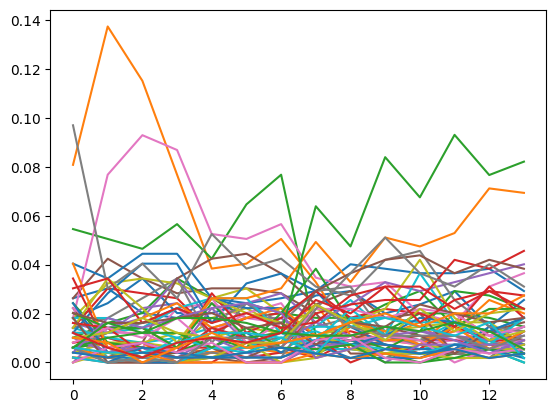

In [ ]:
df=features[0][0]

for _,row in df.iterrows():
    plt.plot(row)

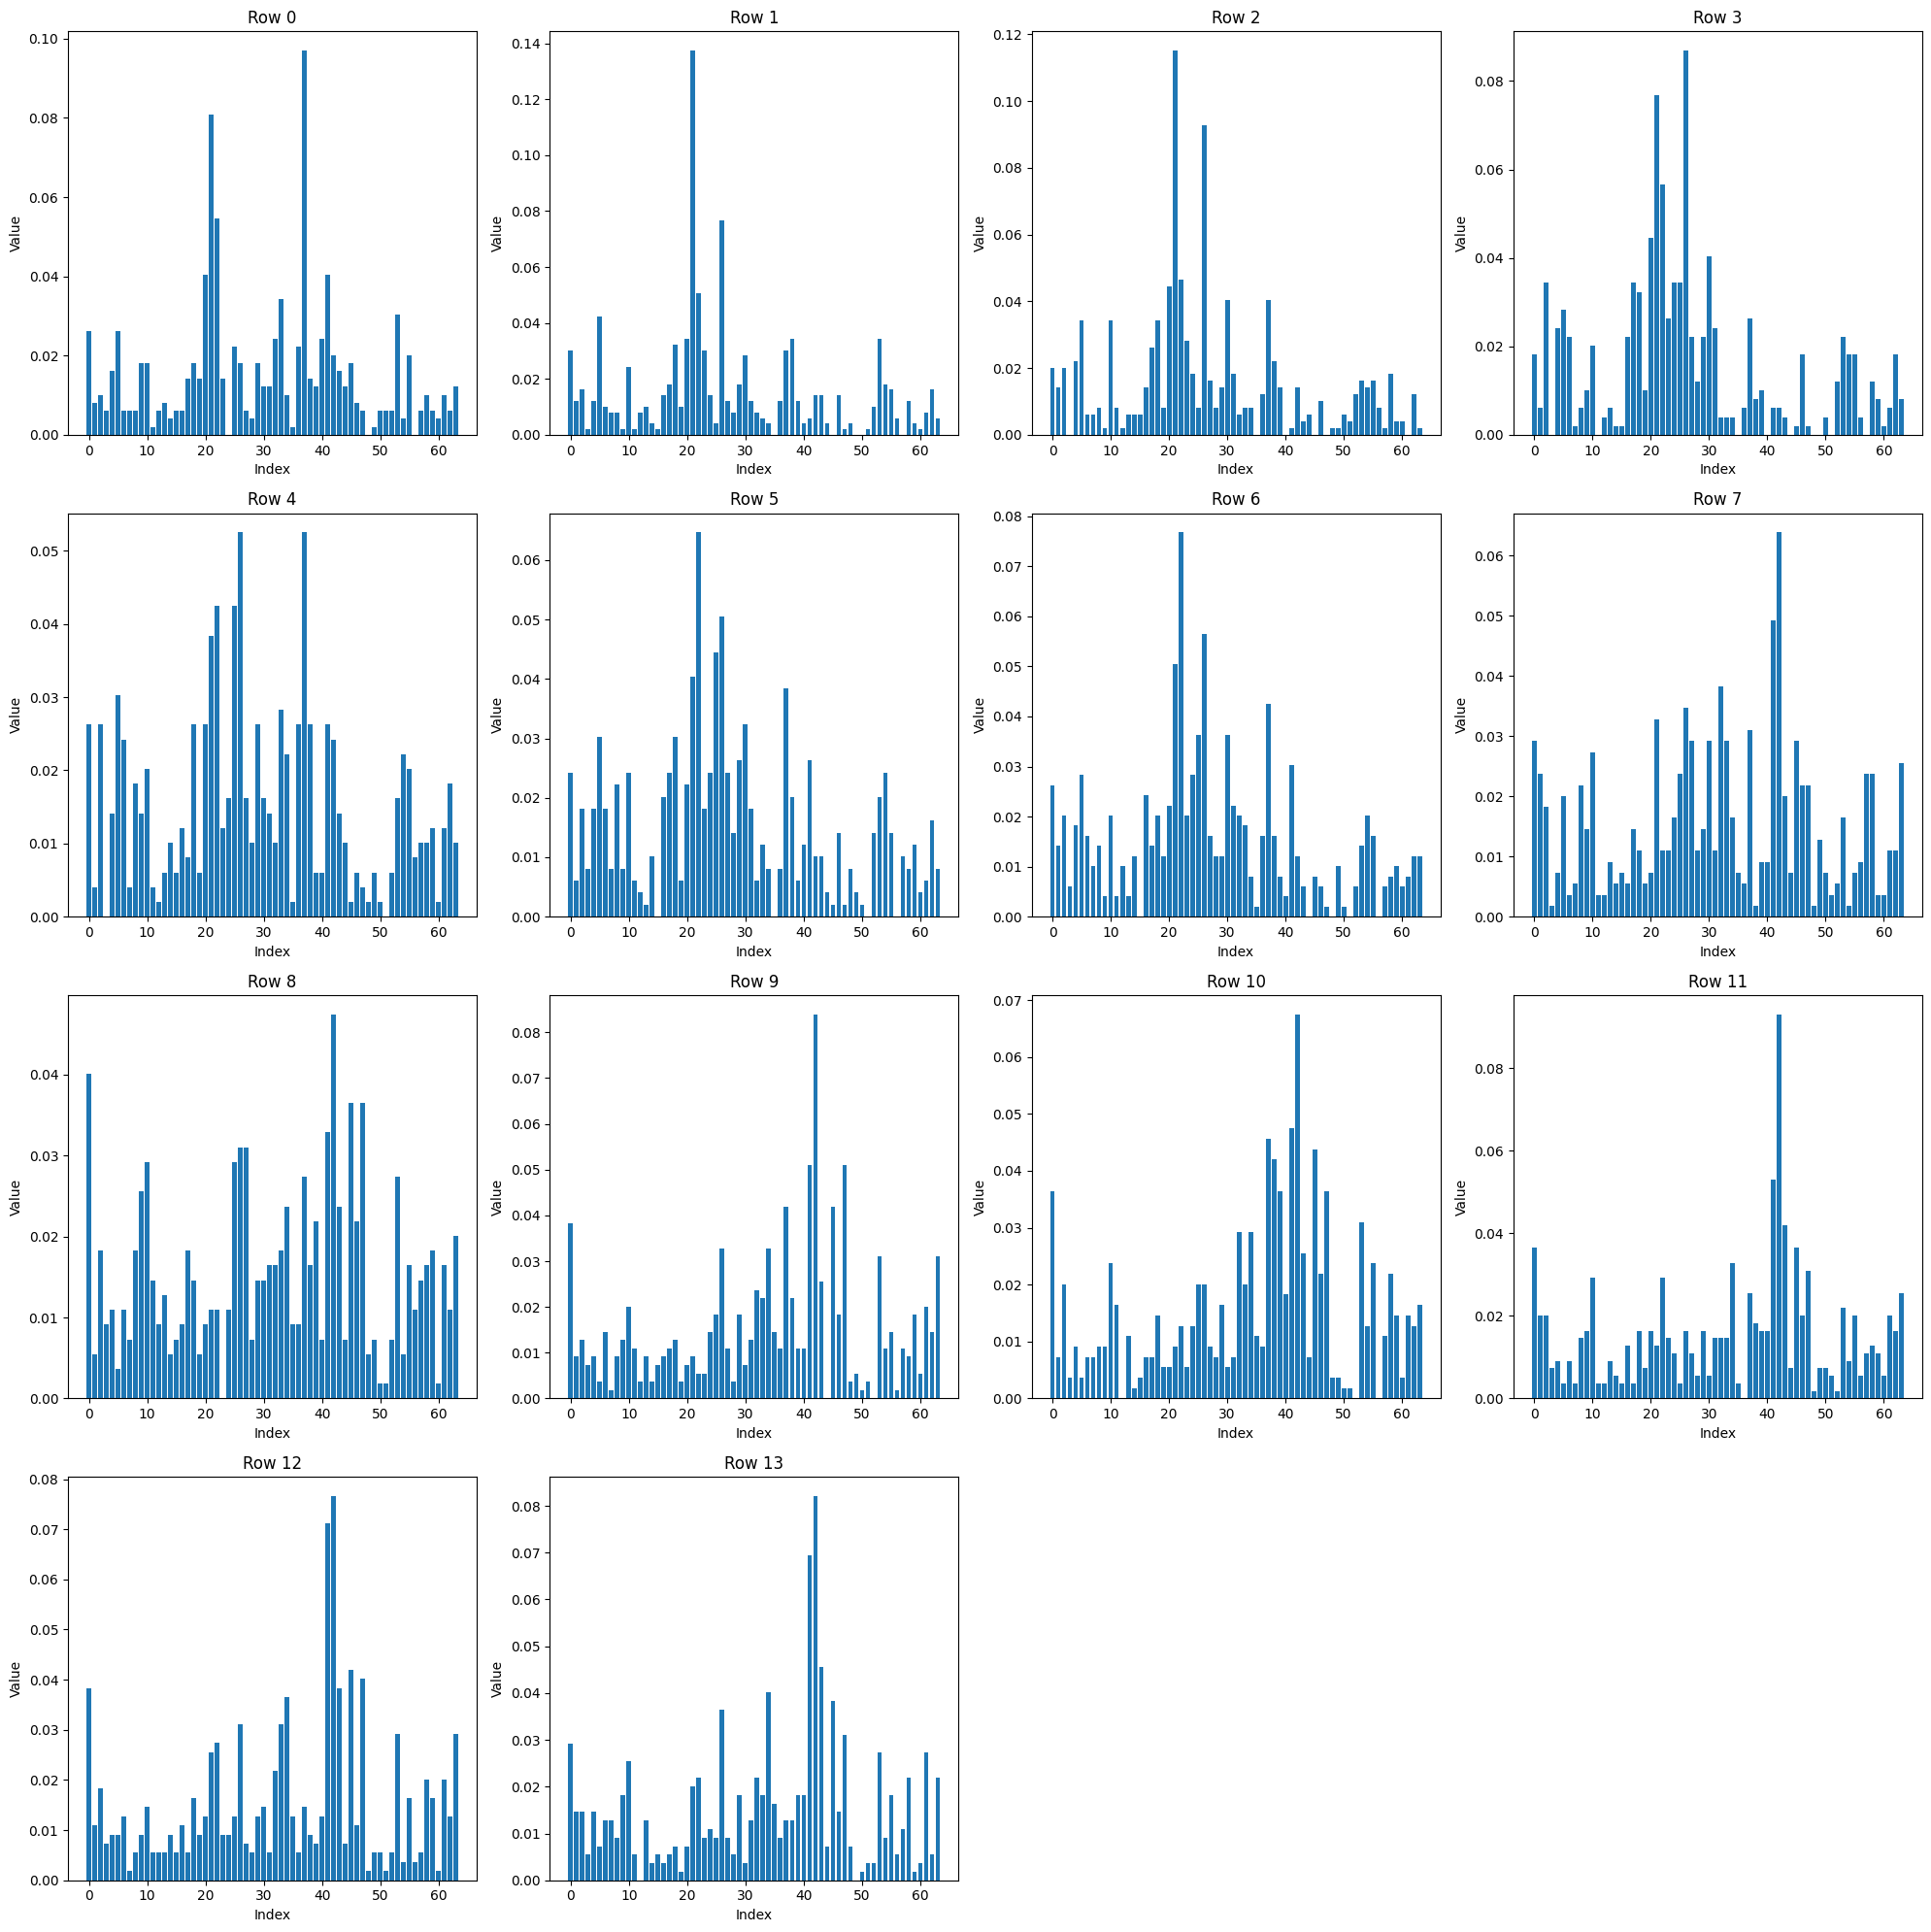

In [ ]:

df=features[0][0]

df=df.T

rows = int(np.ceil(len(df) / 4) ) # Number of rows needed
cols = 4  # Fixed columns

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))  # Adjust figure size
axes = axes.flatten()  # Flatten to 1D for easier indexing

# Plot each row
for i, (index, row) in enumerate(df.iterrows()):
    axes[i].bar(range(len(row)), row)  # Bar chart
    axes[i].set_xlabel('Index')
    axes[i].set_ylabel('Value')
    axes[i].set_title(f'Frame {index}')

# Hide unused subplots if the grid is larger than the number of rows
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
df=control[0]
abs((df['X'].max()-df['X'].min())*(df['Y'].max()-df['Y'].min())*(df['Z'].max()-df['Z'].min()))*10**-6

np.float64(7.520256)

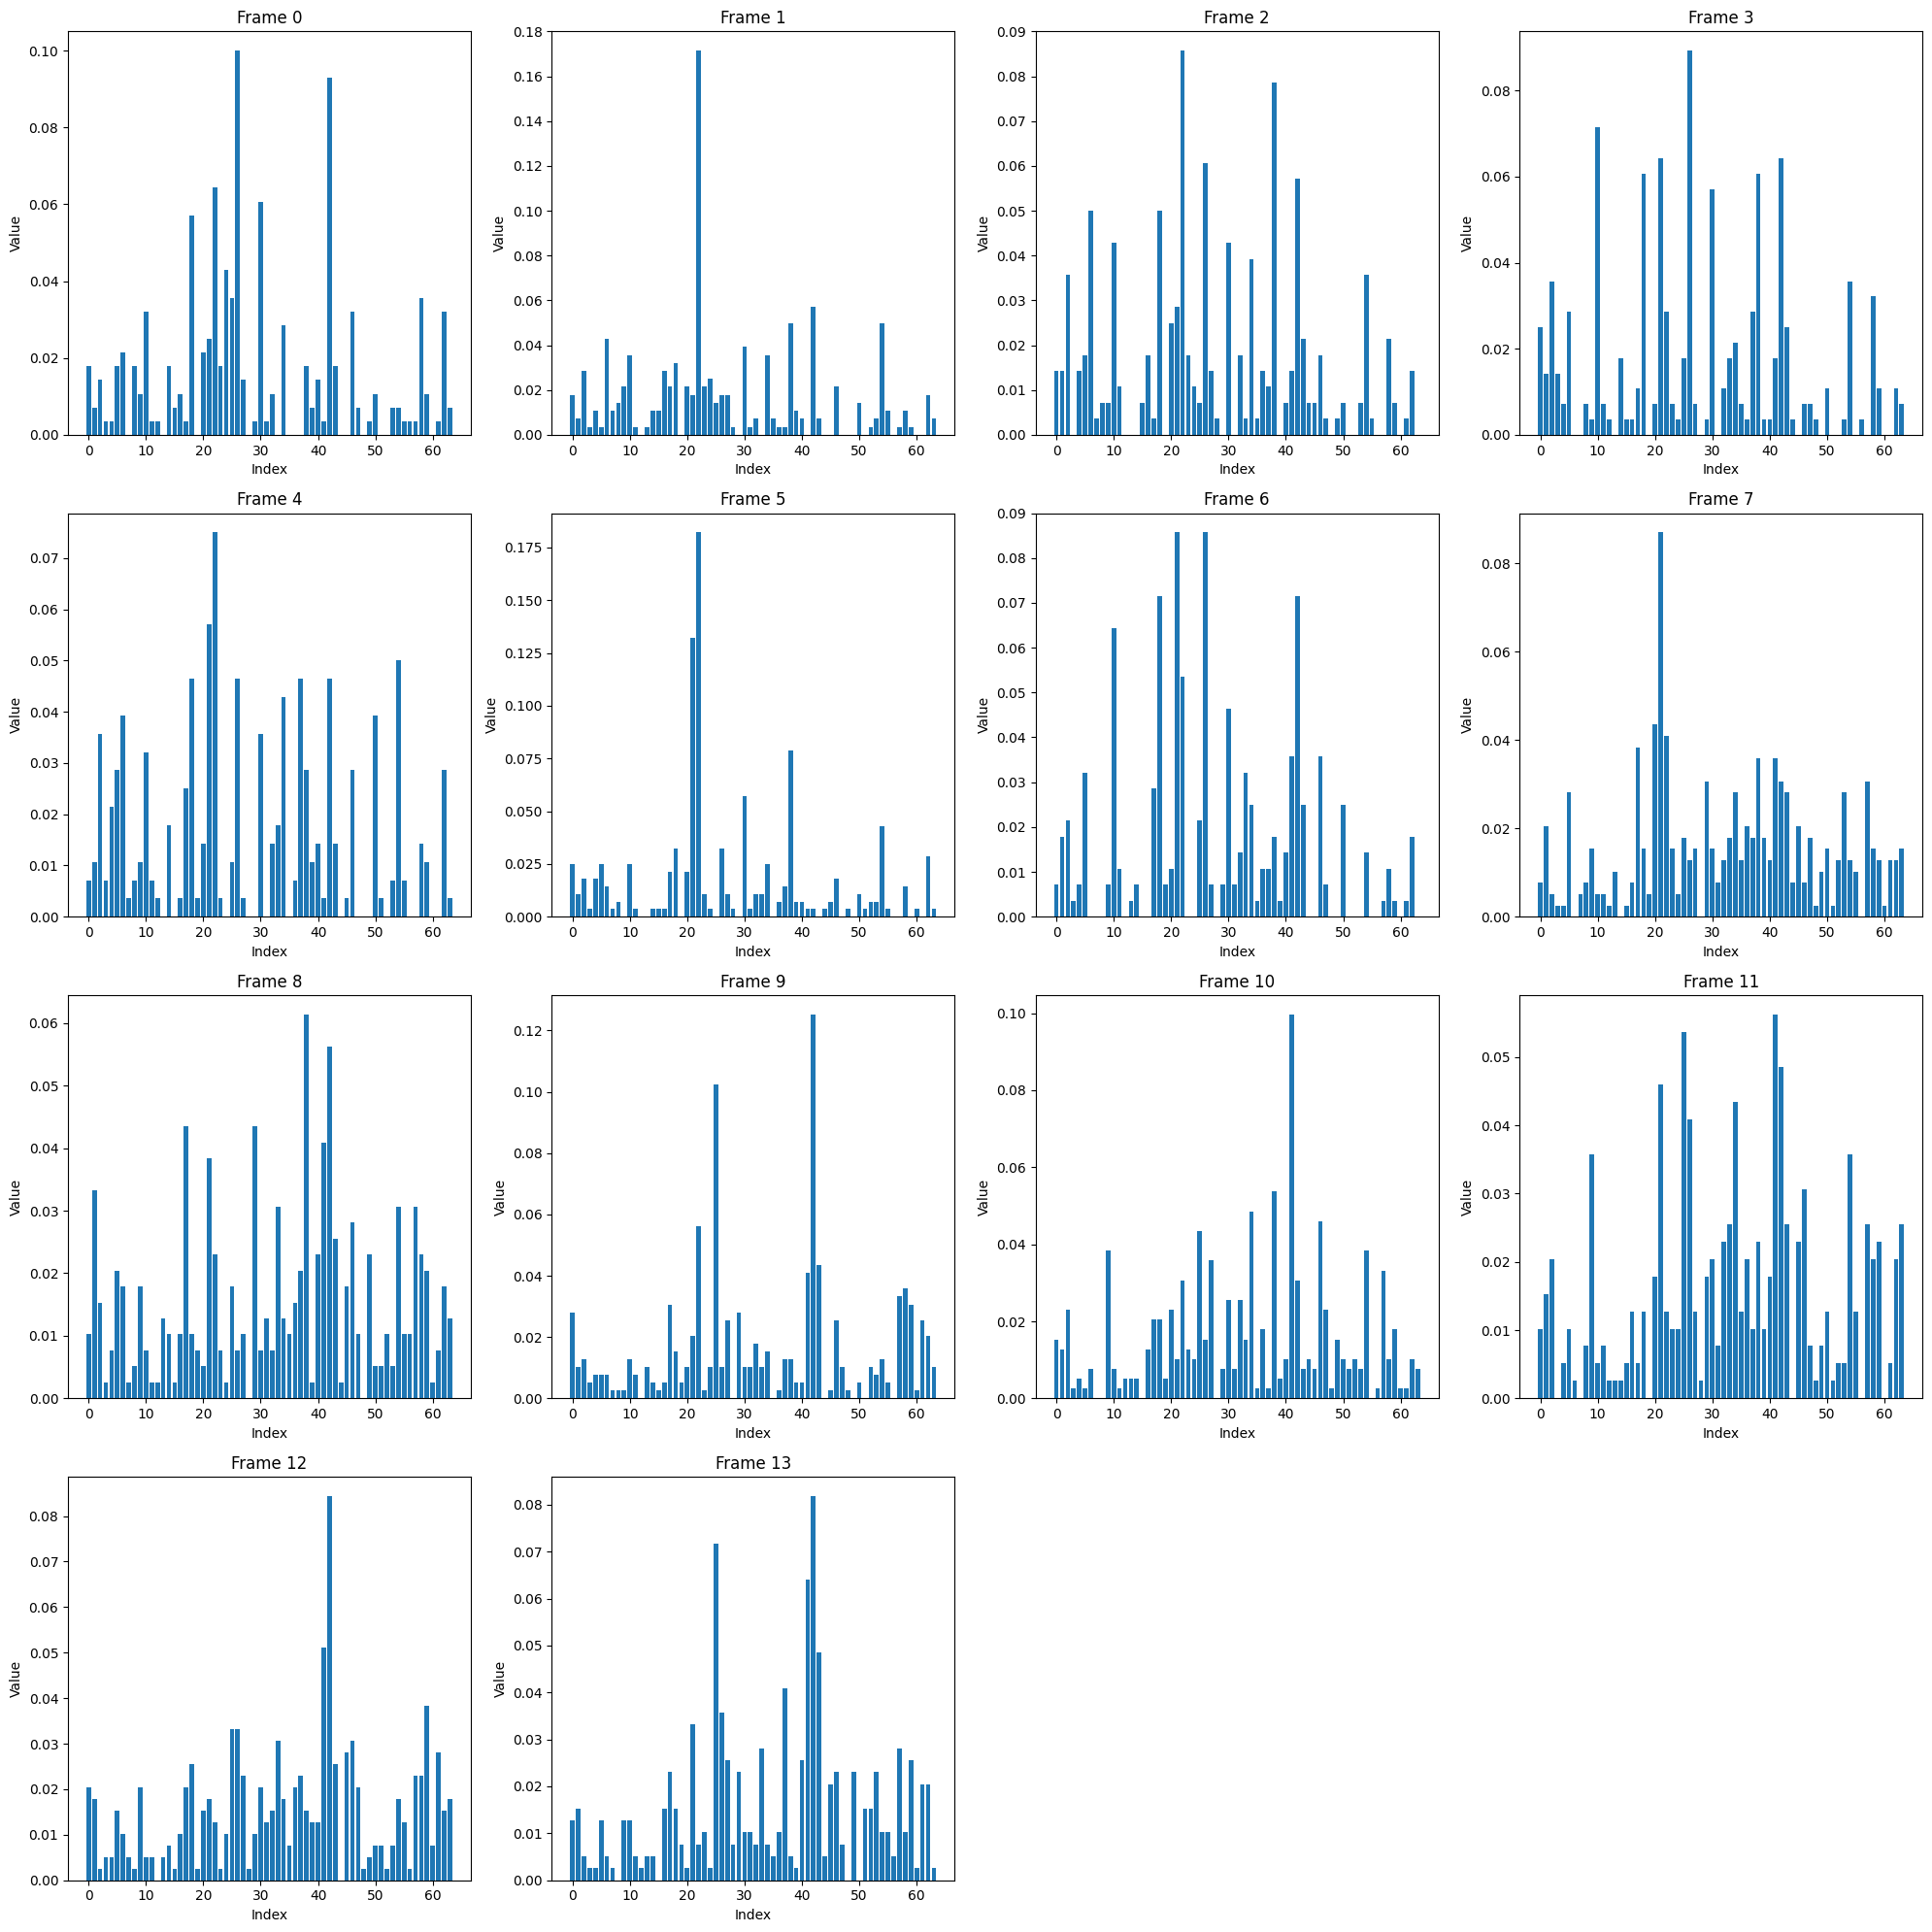

In [ ]:

df=features[6][0]

df=df.T


rows = int(np.ceil(len(df) / 4) ) # Number of rows needed
cols = 4  # Fixed columns

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))  # Adjust figure size
axes = axes.flatten()  # Flatten to 1D for easier indexing

# Plot each row
for i, (index, row) in enumerate(df.iterrows()):
    axes[i].bar(range(len(row)), row)  # Bar chart
    axes[i].set_xlabel('Index')
    axes[i].set_ylabel('Value')
    axes[i].set_title(f'Frame {index}')

# Hide unused subplots if the grid is larger than the number of rows
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()



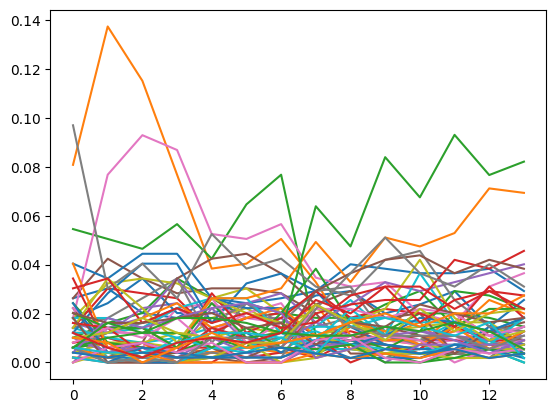

In [ ]:
df=features[0][0]

for _,row in df.iterrows():
    plt.plot(row)

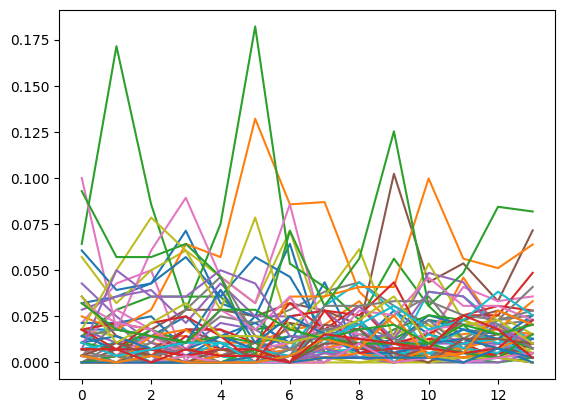

In [ ]:
df=features[6][0]

for _,row in df.iterrows():
    plt.plot(row)

In [ ]:
csv_dir = '../Datasets/XV Clinical Data/adult_controls_from_Miami'
csv_files = [fold for fold in os.listdir(csv_dir) if os.path.isdir(os.path.join(csv_dir, fold))]


dataframe=[]

for fold in csv_files:
    p=os.path.join(csv_dir, fold)
    files=[f for f in os.listdir(p) if os.path.isdir(os.path.join(p, f)) and '-LOBAR' not in f]
    curr_csv=[]
    for f in files:
        path=os.path.join(p, f)
        csv=[pd.read_csv(os.path.join(path,c)) for c in os.listdir(path) if c.endswith('_final.csv')]
        if 'EXP' in f:
            csv[0]['Frame']=csv[0]['Frame']+7
        curr_csv.extend(csv)
    

    dataframe.append(pd.merge(curr_csv[0], curr_csv[1], how='outer'))


In [ ]:
dataframes=[]
for c in dataframe:
    c.columns=['Frame','SV','X','Y','Z']
    dataframes.append([c,0])


lbp=LBP_3DT(dataframes)

featuresA=lbp.extract()


165 110 129


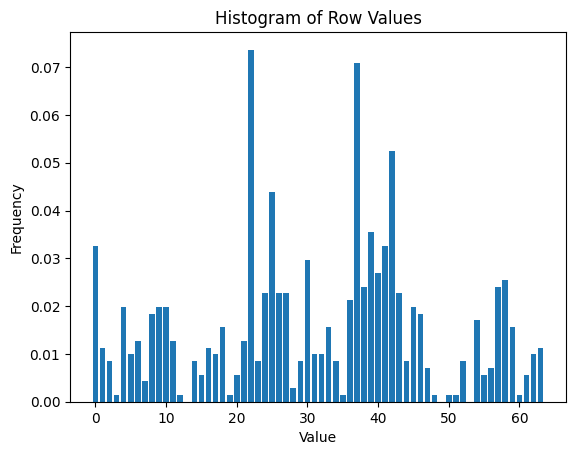

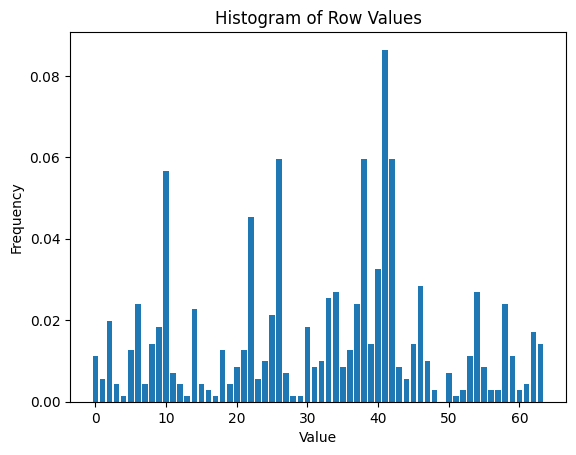

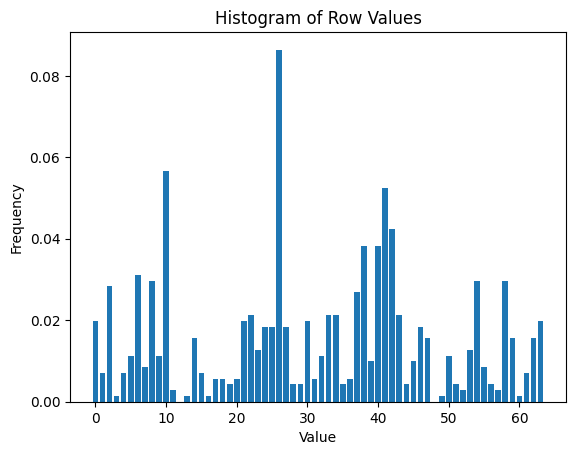

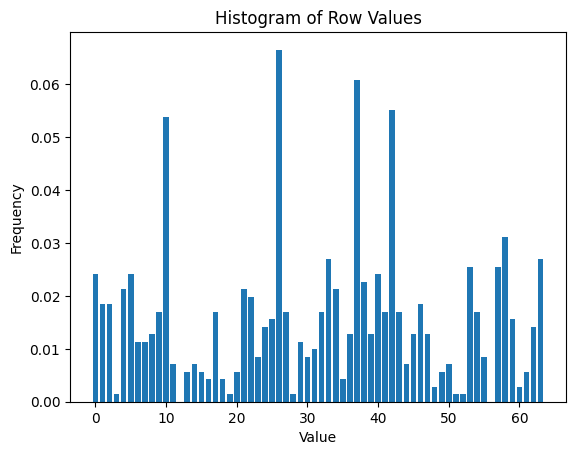

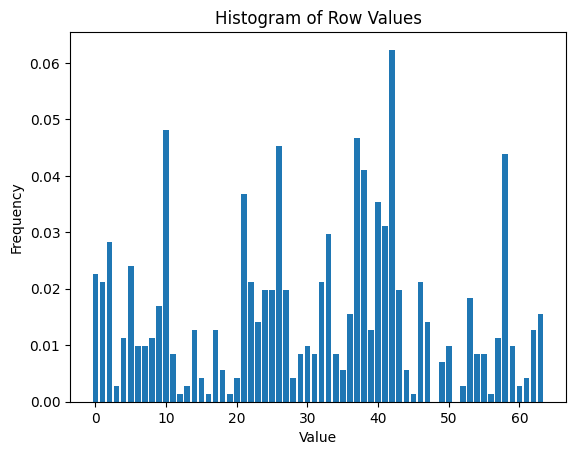

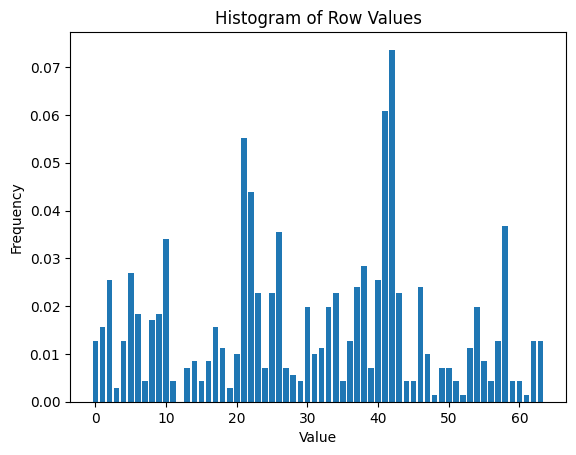

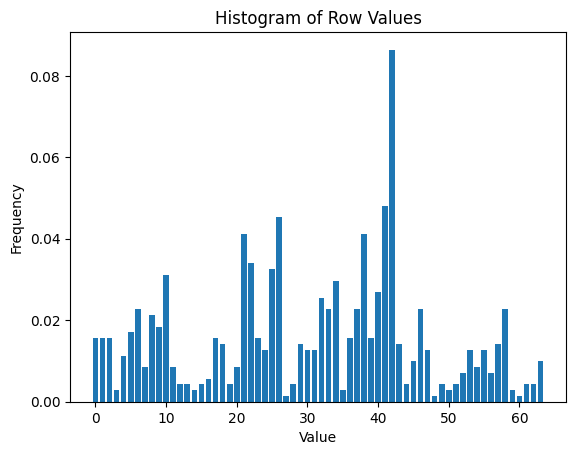

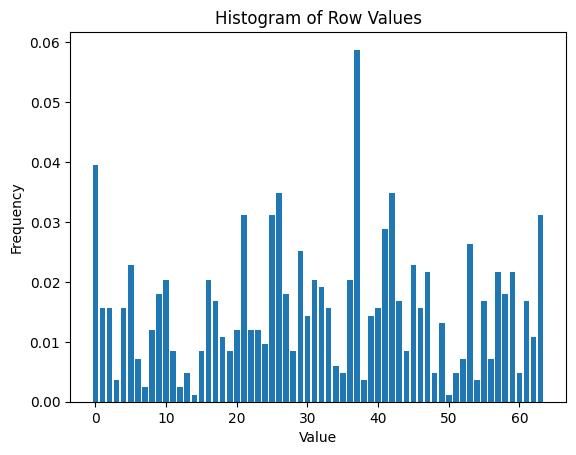

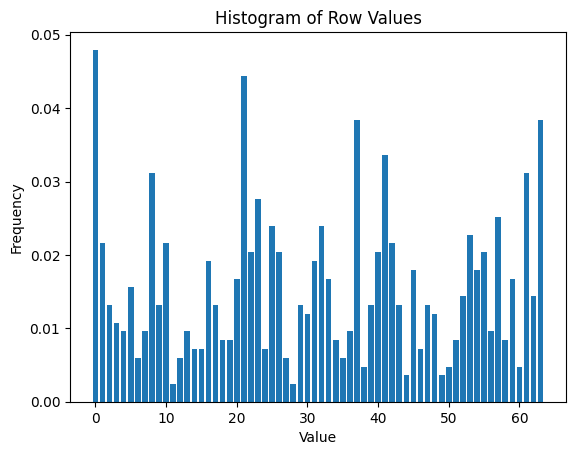

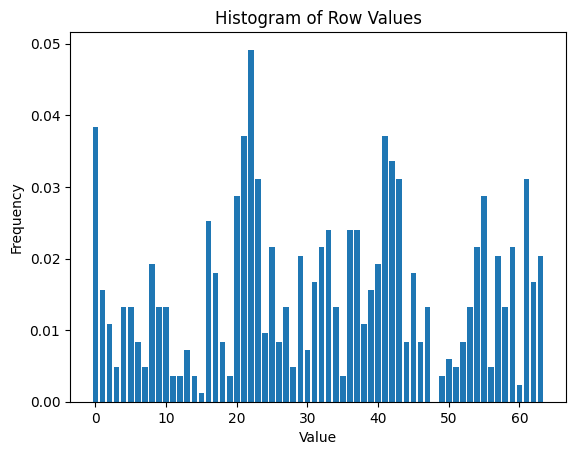

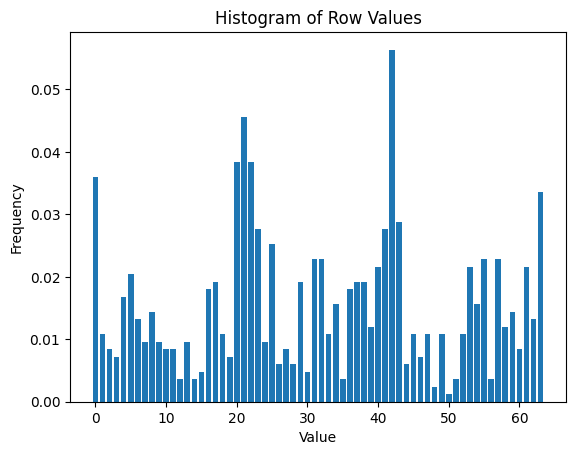

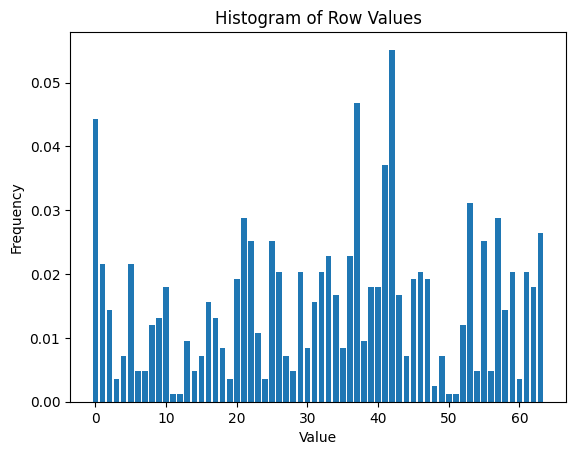

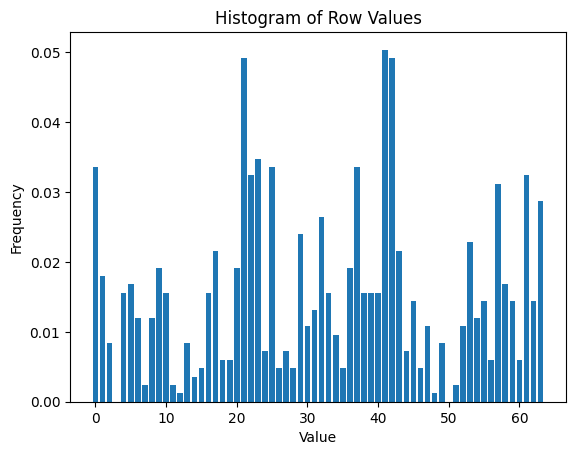

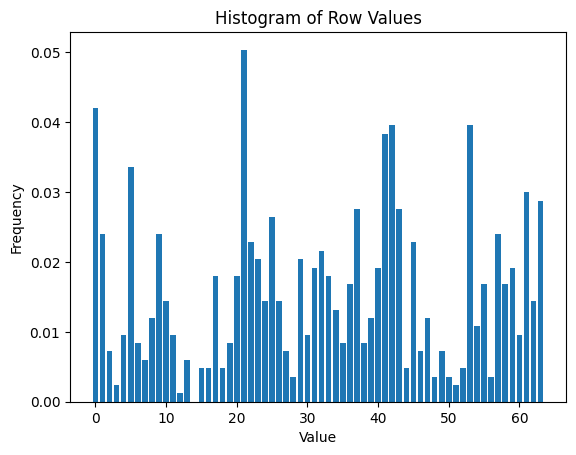

In [ ]:

df=featuresA[6][0]

df=df.T

for index,row in df.iterrows():
    plt.bar(range(64),row)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('Histogram of Row Values')
    plt.show()


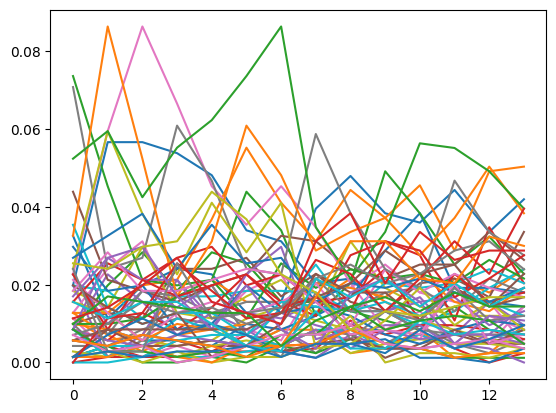

In [ ]:
df=featuresA[6][0]

for _,row in df.iterrows():
    plt.plot(row)

In [7]:

with open('lbp', 'rb') as fp:
    res = pickle.load(fp)

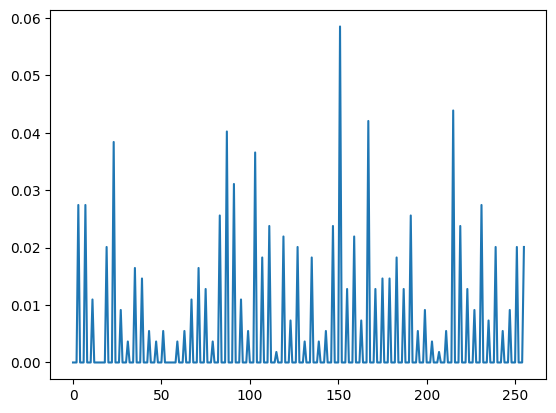

In [16]:
plt.plot(res[0][1].T)

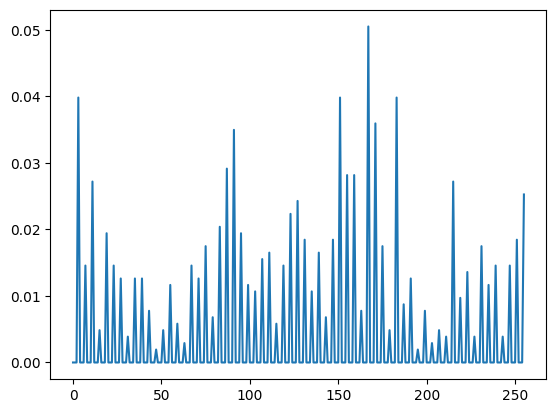

In [22]:
plt.plot(res[5][1].T)

In [25]:
label=[]
features=pd.DataFrame()

for r in res:
    label.append(r[0])
    features=pd.concat([features,r[1]],ignore_index=True)


,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,0.0,0.0,0.0,0.027422,0.0,0.0,0.0,0.027422,0.0,0.0,...,0.0,0.009141,0.0,0.0,0.0,0.020110,0.0,0.0,0.0,0.020110
1,0.0,0.0,0.0,0.028333,0.0,0.0,0.0,0.013333,0.0,0.0,...,0.0,0.025000,0.0,0.0,0.0,0.006667,0.0,0.0,0.0,0.023333
2,0.0,0.0,0.0,0.045169,0.0,0.0,0.0,0.021330,0.0,0.0,...,0.0,0.032622,0.0,0.0,0.0,0.007528,0.0,0.0,0.0,0.030113
3,0.0,0.0,0.0,0.006410,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.038462,0.0,0.0,0.0,0.006410
4,0.0,0.0,0.0,0.059558,0.0,0.0,0.0,0.016330,0.0,0.0,...,0.0,0.022094,0.0,0.0,0.0,0.016330,0.0,0.0,0.0,0.033622
5,0.0,0.0,0.0,0.039806,0.0,0.0,0.0,0.014563,0.0,0.0,...,0.0,0.014563,0.0,0.0,0.0,0.018447,0.0,0.0,0.0,0.025243
6,0.0,0.0,0.0,0.042328,0.0,0.0,0.0,0.010582,0.0,0.0,...,0.0,0.035714,0.0,0.0,0.0,0.021164,0.0,0.0,0.0,0.035714
7,0.0,0.0,0.0,0.012632,0.0,0.0,0.0,0.012632,0.0,0.0,...,0.0,0.035789,0.0,0.0,0.0,0.031579,0.0,0.0,0.0,0.018947
8,0.0,0.0,0.0,0.038947,0.0,0.0,0.0,0.020000,0.0,0.0,...,0.0,0.026316,0.0,0.0,0.0,0.012632,0.0,0.0,0.0,0.025263
9,0.0,0.0,0.0,0.010101,0.0,0.0,0.0,0.006734,0.0,0.0,...,0.0,0.033670,0.0,0.0,0.0,0.013468,0.0,0.0,0.0,0.010101


Classification Report: XGBoost
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.75      1.00      0.86         3

    accuracy                           0.75         4
   macro avg       0.38      0.50      0.43         4
weighted avg       0.56      0.75      0.64         4



/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

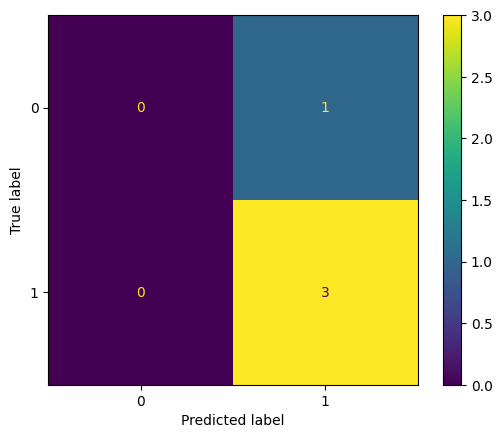

In [62]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report,roc_auc_score

def XGBoost(X_tr, Y_tr, X_te, Y_te,quick=False):
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7, 9],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
    }

    # Create the model
    xgb_model = xgb.XGBClassifier(
        objective='binary:logistic',
        tree_method='hist',
        random_state=42
    )

    if quick:
            best_model = xgb_model
            best_model.fit(X_tr, Y_tr)

            xgb_pred = best_model.predict(X_te)


            ConfusionMatrixDisplay.from_estimator(estimator=best_model, X=X_te, y=Y_te)

            print("Classification Report: XGBoost")
            report = classification_report(Y_te, xgb_pred, digits=2)
            print(report)
            return best_model


    grid_search = GridSearchCV(
        estimator=xgb_model,
        param_grid=param_grid,
        scoring='accuracy',  
        cv=10,  
        verbose=1,
        n_jobs=-1  
    )

  
    grid_search.fit(X_tr, Y_tr)

   
    best_model = grid_search.best_estimator_
    best_model.fit(X_tr, Y_tr)

    xgb_pred = best_model.predict(X_te)

    ConfusionMatrixDisplay.from_estimator(estimator=best_model, X=X_te, y=Y_te)

    print("Classification Report: XGBoost")
    report = classification_report(Y_te, xgb_pred, digits=2)
    print(report)
    return best_model


X_tr, X_te, Y_tr, Y_te = train_test_split(features.values, label, test_size=0.2, random_state=42,stratify=label)
m=XGBoost(X_tr, Y_tr, X_te, Y_te,True)


XGBoostError: [17:21:59] /Users/runner/work/xgboost/xgboost/src/predictor/cpu_predictor.cc:789: Check failed: m->NumColumns() == model.learner_model_param->num_feature (1 vs. 256) : Number of columns in data must equal to trained model.
Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x000000012cc95605 dmlc::LogMessageFatal::~LogMessageFatal() + 117
  [bt] (1) 2   libxgboost.dylib                    0x000000012cfd21d6 void xgboost::predictor::CPUPredictor::DispatchedInplacePredict<xgboost::data::ArrayAdapter, 64ul>(std::__1::any const&, std::__1::shared_ptr<xgboost::DMatrix>, xgboost::gbm::GBTreeModel const&, float, xgboost::PredictionCacheEntry*, unsigned int, unsigned int) const + 406
  [bt] (2) 3   libxgboost.dylib                    0x000000012cfc5df6 xgboost::predictor::CPUPredictor::InplacePredict(std::__1::shared_ptr<xgboost::DMatrix>, xgboost::gbm::GBTreeModel const&, float, xgboost::PredictionCacheEntry*, unsigned int, unsigned int) const + 1494
  [bt] (3) 4   libxgboost.dylib                    0x000000012ced84ab xgboost::gbm::GBTree::InplacePredict(std::__1::shared_ptr<xgboost::DMatrix>, float, xgboost::PredictionCacheEntry*, int, int) const + 523
  [bt] (4) 5   libxgboost.dylib                    0x000000012cefa72a xgboost::LearnerImpl::InplacePredict(std::__1::shared_ptr<xgboost::DMatrix>, xgboost::PredictionType, float, xgboost::HostDeviceVector<float>**, int, int) + 138
  [bt] (5) 6   libxgboost.dylib                    0x000000012cd558a0 InplacePredictImpl(std::__1::shared_ptr<xgboost::DMatrix>, char const*, xgboost::Learner*, unsigned long long const**, unsigned long long*, float const**) + 272
  [bt] (6) 7   libxgboost.dylib                    0x000000012cd55f7f XGBoosterPredictFromDense + 463
  [bt] (7) 8   libffi.dylib                        0x00007ff8185138c2 ffi_call_unix64 + 82

